In [54]:
# Read the sample data
import pandas as pd
cash_friends_df = pd.read_parquet("cash_friends.parquet")
cash_friends_df.head()

,user_id,account_creation_date,gender,count_num_transactions_last_yr,sum_amount_spent_all_time_usd,current_cash_account_balance_usd,current_bitcoin_account_balance_btc,current_stock_account_balance_usd,cash_card_enabled,direct_deposit_enabled,cash_boost_used,most_interacted_user_index,user_occupation,location,most_used_cash_app_feature,account_age_yr,most_interacted_user_id
0,LyuLjUo0dH,2020-04-01,Male,14,1383.0,714.0,2.27,1432.0,Yes,Yes,Yes,442,Lawyer,Wyoming,Peer to Peer Payment,3,dt8BG7TNjO
1,86lAOsc1Gh,2015-07-19,Male,15,528.0,262.0,3.52,2525.0,Yes,No,Yes,842,Lawyer,Connecticut,Investing,8,3WfkGmY1HF
2,YcI21zkiL1,2019-04-23,Female,16,720.0,753.0,1.65,2686.0,No,Yes,No,4698,Designer,Illinois,Cash Card,4,TSFnHGhvcb
3,10zlKlUH4r,2018-11-29,Male,30,1062.0,736.0,2.35,2751.0,No,No,Yes,467,Doctor,Washington,Cash Card,4,vH6YkrHISj
4,dflMuC8Yz8,2015-10-06,Male,11,199.0,350.0,2.53,1550.0,No,Yes,No,3724,Nurse,Kentucky,Boost,7,zTbIUEjCJJ


In [55]:
# Describe the dataset
cash_friends_df.describe()

,count_num_transactions_last_yr,sum_amount_spent_all_time_usd,current_cash_account_balance_usd,current_bitcoin_account_balance_btc,current_stock_account_balance_usd,most_interacted_user_index,account_age_yr
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,20.053400,1023.750600,487.040000,2.188340,2473.843000,2494.692800,4.520400
std,4.498421,301.665787,149.281815,0.596625,701.472917,1449.755249,2.855734
min,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,823.000000,386.000000,1.780000,1995.000000,1208.000000,2.000000
50%,20.000000,1025.000000,488.000000,2.195000,2462.000000,2501.000000,4.000000
75%,23.000000,1223.000000,586.000000,2.600000,2953.250000,3746.250000,7.000000
max,37.000000,2017.000000,1103.000000,4.260000,5154.000000,4998.000000,9.000000


In [56]:
# List the columns
cash_friends_df.columns

Index(['user_id', 'account_creation_date', 'gender',
       'count_num_transactions_last_yr', 'sum_amount_spent_all_time_usd',
       'current_cash_account_balance_usd',
       'current_bitcoin_account_balance_btc',
       'current_stock_account_balance_usd', 'cash_card_enabled',
       'direct_deposit_enabled', 'cash_boost_used',
       'most_interacted_user_index', 'user_occupation', 'location',
       'most_used_cash_app_feature', 'account_age_yr',
       'most_interacted_user_id'],
      dtype='object')

In [57]:
# Encode the categorical columns
from sklearn import preprocessing

def encode_categorical_columns(cols):
    for col in cols:
        label_encoder = preprocessing.LabelEncoder()
        encoded_col = label_encoder.fit_transform(cash_friends_df[col].values.tolist())
        cash_friends_df[col + "_encoded"] = encoded_col

In [58]:
# Encode the binary columns
from sklearn import preprocessing

def encode_binary_columns(cols):
    for col in cols:
        label_encoder = preprocessing.LabelBinarizer()
        encoded_col = label_encoder.fit_transform(cash_friends_df[col].values.tolist())
        cash_friends_df[col + "_encoded"] = encoded_col

In [59]:
# Encode the columns
categorical_cols = ["user_occupation", "most_used_cash_app_feature"]
encode_categorical_columns(categorical_cols)

binary_cols = ["cash_card_enabled", "direct_deposit_enabled", "gender", "cash_boost_used"]
encode_binary_columns(binary_cols)

In [60]:
cash_friends_df

,user_id,account_creation_date,gender,count_num_transactions_last_yr,sum_amount_spent_all_time_usd,current_cash_account_balance_usd,current_bitcoin_account_balance_btc,current_stock_account_balance_usd,cash_card_enabled,direct_deposit_enabled,...,location,most_used_cash_app_feature,account_age_yr,most_interacted_user_id,user_occupation_encoded,most_used_cash_app_feature_encoded,cash_card_enabled_encoded,direct_deposit_enabled_encoded,gender_encoded,cash_boost_used_encoded
0,LyuLjUo0dH,2020-04-01,Male,14,1383.0,714.0,2.27,1432.0,Yes,Yes,...,Wyoming,Peer to Peer Payment,3,dt8BG7TNjO,6,4,1,1,1,1
1,86lAOsc1Gh,2015-07-19,Male,15,528.0,262.0,3.52,2525.0,Yes,No,...,Connecticut,Investing,8,3WfkGmY1HF,6,3,1,0,1,1
2,YcI21zkiL1,2019-04-23,Female,16,720.0,753.0,1.65,2686.0,No,Yes,...,Illinois,Cash Card,4,TSFnHGhvcb,1,1,0,1,0,0
3,10zlKlUH4r,2018-11-29,Male,30,1062.0,736.0,2.35,2751.0,No,No,...,Washington,Cash Card,4,vH6YkrHISj,3,1,0,0,1,1
4,dflMuC8Yz8,2015-10-06,Male,11,199.0,350.0,2.53,1550.0,No,Yes,...,Kentucky,Boost,7,zTbIUEjCJJ,7,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,bQImUYGXHv,2021-07-29,Female,16,1162.0,285.0,2.37,3025.0,No,Yes,...,Nebraska,Direct Deposit,2,yo9wwcoi8r,2,2,0,1,0,0
4996,0qbgYNZIwB,2022-01-25,Female,23,1011.0,266.0,2.40,3675.0,Yes,Yes,...,Missouri,Investing,1,ZpI4lQ4nkR,1,3,1,1,0,0
4997,ah4go28069,2020-08-01,Female,23,535.0,487.0,1.83,2134.0,Yes,Yes,...,Iowa,Investing,3,XBIWIfUI29,2,3,1,1,0,1
4998,yjMC6Bd731,2015-04-10,Female,14,1184.0,169.0,1.80,3730.0,Yes,No,...,Wisconsin,Boost,8,0OJBvYHMIO,1,0,1,0,0,1


<AxesSubplot:>

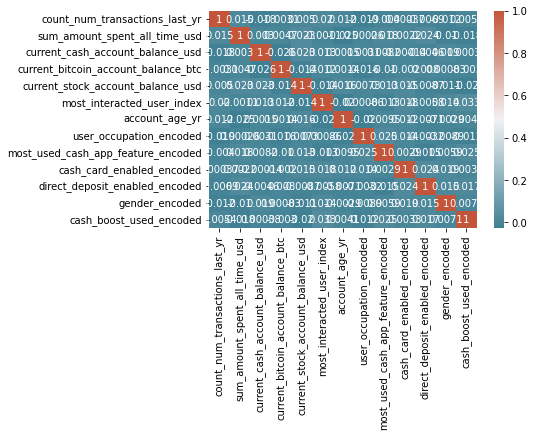

In [61]:
# Plot the heatmap for correlation
import matplotlib.pylab as plt
import seaborn as sns

corr = cash_friends_df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [62]:
# feature vector
# row 0 as our target
# compute distance between target and the rest of the vectors
# which distance? ->

#
def compare_vector(v1, v2)
[0,1,891, ]

SyntaxError: invalid syntax (1203155448.py, line 7)

In [ ]:
cash_friends_df.columns

In [ ]:
# Drop non numerical columns for distance calculation
vector_df = cash_friends_df.drop(columns=['user_id', 'most_interacted_user_id', 'account_creation_date', 'gender', 'cash_card_enabled', 'direct_deposit_enabled', 'cash_boost_used', 'user_occupation', 'location',
       'most_used_cash_app_feature'])

In [69]:
vector_df

,count_num_transactions_last_yr,sum_amount_spent_all_time_usd,current_cash_account_balance_usd,current_bitcoin_account_balance_btc,current_stock_account_balance_usd,most_interacted_user_index,account_age_yr,user_occupation_encoded,most_used_cash_app_feature_encoded,cash_card_enabled_encoded,direct_deposit_enabled_encoded,gender_encoded,cash_boost_used_encoded
0,14,1383.0,714.0,2.27,1432.0,442,3,6,4,1,1,1,1
1,15,528.0,262.0,3.52,2525.0,842,8,6,3,1,0,1,1
2,16,720.0,753.0,1.65,2686.0,4698,4,1,1,0,1,0,0
3,30,1062.0,736.0,2.35,2751.0,467,4,3,1,0,0,1,1
4,11,199.0,350.0,2.53,1550.0,3724,7,7,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,16,1162.0,285.0,2.37,3025.0,3492,2,2,2,0,1,0,0
4996,23,1011.0,266.0,2.40,3675.0,3848,1,1,3,1,1,0,0
4997,23,535.0,487.0,1.83,2134.0,2274,3,2,3,1,1,0,1
4998,14,1184.0,169.0,1.80,3730.0,599,8,1,0,1,0,0,1


In [63]:
# Try different distance metrics for the dataset

In [70]:
# Euclidian distance
from scipy.spatial import distance

def euclidean_distance(row1, row2):
    return distance.euclidean(row1, row2)

# Using row 0 as our target row
target_row = vector_df.iloc[0]

# Calculate Euclidean distance between target row and all other rows
vector_df["euclidian_distances"] = vector_df.apply(lambda row: euclidean_distance(target_row, row), axis=1)

In [71]:
# Minkowski distance
def minkowski_distance(row1, row2, p):
    return distance.minkowski(row1, row2, p)

p=2

# Using row 0 as our target row
target_row = vector_df.iloc[0]

# Calculate Minkowski distance between target row and all other rows
vector_df["minkowski_distances"] = vector_df.apply(lambda row: minkowski_distance(target_row, row, p), axis=1)

In [117]:
vector_df.head()

,count_num_transactions_last_yr,sum_amount_spent_all_time_usd,current_cash_account_balance_usd,current_bitcoin_account_balance_btc,current_stock_account_balance_usd,most_interacted_user_index,account_age_yr,user_occupation_encoded,most_used_cash_app_feature_encoded,cash_card_enabled_encoded,direct_deposit_enabled_encoded,gender_encoded,cash_boost_used_encoded,euclidian_distances,minkowski_distances,manhattan_distances
0,14,1383.0,714.0,2.27,1432.0,442,3,6,4,1,1,1,1,0.000000,0.000000,0.000000
1,15,528.0,262.0,3.52,2525.0,842,8,6,3,1,0,1,1,1513.277094,2140.096990,6462.624083
2,16,720.0,753.0,1.65,2686.0,4698,4,1,1,0,1,0,0,4486.333067,6344.633068,17057.586135
3,30,1062.0,736.0,2.35,2751.0,467,4,3,1,0,0,1,1,1358.008839,1920.514518,4990.603357
4,11,199.0,350.0,2.53,1550.0,3724,7,7,0,0,1,1,0,3509.963542,4963.838045,13436.061587


In [72]:
# Manhattan distance
def manhattan_distance(row1, row2):
    return distance.cityblock(row1, row2)

# Using row 0 as our target row
target_row = vector_df.iloc[0]

# Calculate Euclidean distance between target row and all other rows
vector_df["manhattan_distances"] = vector_df.apply(lambda row: manhattan_distance(target_row, row), axis=1)

,count_num_transactions_last_yr,sum_amount_spent_all_time_usd,current_cash_account_balance_usd,current_bitcoin_account_balance_btc,current_stock_account_balance_usd,most_interacted_user_index,account_age_yr,user_occupation_encoded,most_used_cash_app_feature_encoded,cash_card_enabled_encoded,direct_deposit_enabled_encoded,gender_encoded,cash_boost_used_encoded,euclidian_distances,minkowski_distances,manhattan_distances
0,14,1383.0,714.0,2.27,1432.0,442,3,6,4,1,1,1,1,0.000000,0.000000,0.000000
1,15,528.0,262.0,3.52,2525.0,842,8,6,3,1,0,1,1,1513.277094,2140.096990,6462.624083
2,16,720.0,753.0,1.65,2686.0,4698,4,1,1,0,1,0,0,4486.333067,6344.633068,17057.586135
3,30,1062.0,736.0,2.35,2751.0,467,4,3,1,0,0,1,1,1358.008839,1920.514518,4990.603357
4,11,199.0,350.0,2.53,1550.0,3724,7,7,0,0,1,1,0,3509.963542,4963.838045,13436.061587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,16,1162.0,285.0,2.37,3025.0,3492,2,2,2,0,1,0,0,3474.630773,4913.869964,13693.600737
4996,23,1011.0,266.0,2.40,3675.0,3848,1,1,3,1,1,0,0,4119.597798,5825.991077,16433.718875
4997,23,535.0,487.0,1.83,2134.0,2274,3,2,3,1,1,0,1,2149.362741,3039.657939,8813.460680
4998,14,1184.0,169.0,1.80,3730.0,599,8,1,0,1,0,0,1,2375.320446,3359.210390,8950.000836


In [84]:
# Ranking by euclidean distance 
euclidian_distances = vector_df["euclidian_distances"]
euc_dict = euclidian_distances.to_dict()
ordered_customers_euc =[(customer, distance) for customer, distance in euc_dict.items()]
ordered_customers_euc.sort(key=lambda elem: elem[1])


In [88]:
# Ranking by Manhattan distance 
manhattan_distances = vector_df["manhattan_distances"]
man_dict = manhattan_distances.to_dict()
ordered_customers_man =[(customer, distance) for customer, distance in man_dict.items()]
ordered_customers_man.sort(key=lambda elem: elem[1])


In [89]:
# Ranking by Minkowski distance 
minkowski_distances = vector_df["minkowski_distances"]
min_dict = minkowski_distances.to_dict()
ordered_customers_min =[(customer, distance) for customer, distance in min_dict.items()]
ordered_customers_min.sort(key=lambda elem: elem[1])

In [92]:
ordered_customers_euc[:5]

[(0, 0.0),
 (1772, 206.0826360953295),
 (981, 280.55483314318434),
 (2443, 300.237612733648),
 (3320, 301.38363608530574)]

In [93]:
ordered_customers_man[:5]

[(0, 0.0),
 (1772, 801.7574950309436),
 (981, 1230.4392831635962),
 (3320, 1253.9144617144625),
 (2443, 1307.6277165960942)]

In [91]:
ordered_customers_min[:5]

[(0, 0.0),
 (1772, 291.4448589356141),
 (981, 396.76445002041197),
 (2443, 424.6001038624461),
 (3320, 426.2208256291567)]

In [96]:
# What are these customers ?
# target
cash_friends_df.iloc[0]

user_id                                          LyuLjUo0dH
account_creation_date                   2020-04-01 00:00:00
gender                                                 Male
count_num_transactions_last_yr                           14
sum_amount_spent_all_time_usd                        1383.0
current_cash_account_balance_usd                      714.0
current_bitcoin_account_balance_btc                    2.27
current_stock_account_balance_usd                    1432.0
cash_card_enabled                                       Yes
direct_deposit_enabled                                  Yes
cash_boost_used                                         Yes
most_interacted_user_index                              442
user_occupation                                      Lawyer
location                                            Wyoming
most_used_cash_app_feature             Peer to Peer Payment
account_age_yr                                            3
most_interacted_user_id                 

In [97]:
# Top 5 recommendations:
cash_friends_df.iloc[1772]

user_id                                         FeKVVsuTml
account_creation_date                  2020-06-16 00:00:00
gender                                              Female
count_num_transactions_last_yr                          16
sum_amount_spent_all_time_usd                       1377.0
current_cash_account_balance_usd                     698.0
current_bitcoin_account_balance_btc                   2.04
current_stock_account_balance_usd                   1618.0
cash_card_enabled                                       No
direct_deposit_enabled                                  No
cash_boost_used                                         No
most_interacted_user_index                             529
user_occupation                               Entrepreneur
location                                        Washington
most_used_cash_app_feature                  Direct Deposit
account_age_yr                                           3
most_interacted_user_id                         aL8IUZbB

In [98]:
cash_friends_df.iloc[981]

user_id                                         IZM6SBHFke
account_creation_date                  2023-04-05 00:00:00
gender                                              Female
count_num_transactions_last_yr                          25
sum_amount_spent_all_time_usd                       1285.0
current_cash_account_balance_usd                     630.0
current_bitcoin_account_balance_btc                   2.39
current_stock_account_balance_usd                   1595.0
cash_card_enabled                                       No
direct_deposit_enabled                                  No
cash_boost_used                                         No
most_interacted_user_index                             630
user_occupation                                     Lawyer
location                                          Illinois
most_used_cash_app_feature                  Direct Deposit
account_age_yr                                           0
most_interacted_user_id                         k3TEzpbD

In [99]:
cash_friends_df.iloc[2443]

user_id                                         4Zhzb1WcPH
account_creation_date                  2016-09-16 00:00:00
gender                                              Female
count_num_transactions_last_yr                          25
sum_amount_spent_all_time_usd                       1244.0
current_cash_account_balance_usd                     508.0
current_bitcoin_account_balance_btc                   3.06
current_stock_account_balance_usd                   1277.0
cash_card_enabled                                      Yes
direct_deposit_enabled                                 Yes
cash_boost_used                                        Yes
most_interacted_user_index                             377
user_occupation                                     Lawyer
location                                             Maine
most_used_cash_app_feature                  Direct Deposit
account_age_yr                                           6
most_interacted_user_id                         DfkZXWC3

In [100]:
from keras.layers import Input, Embedding, Dot, Reshape, Dense
from keras.models import Model


In [102]:
vector_df

,count_num_transactions_last_yr,sum_amount_spent_all_time_usd,current_cash_account_balance_usd,current_bitcoin_account_balance_btc,current_stock_account_balance_usd,most_interacted_user_index,account_age_yr,user_occupation_encoded,most_used_cash_app_feature_encoded,cash_card_enabled_encoded,direct_deposit_enabled_encoded,gender_encoded,cash_boost_used_encoded,euclidian_distances,minkowski_distances,manhattan_distances
0,14,1383.0,714.0,2.27,1432.0,442,3,6,4,1,1,1,1,0.000000,0.000000,0.000000
1,15,528.0,262.0,3.52,2525.0,842,8,6,3,1,0,1,1,1513.277094,2140.096990,6462.624083
2,16,720.0,753.0,1.65,2686.0,4698,4,1,1,0,1,0,0,4486.333067,6344.633068,17057.586135
3,30,1062.0,736.0,2.35,2751.0,467,4,3,1,0,0,1,1,1358.008839,1920.514518,4990.603357
4,11,199.0,350.0,2.53,1550.0,3724,7,7,0,0,1,1,0,3509.963542,4963.838045,13436.061587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,16,1162.0,285.0,2.37,3025.0,3492,2,2,2,0,1,0,0,3474.630773,4913.869964,13693.600737
4996,23,1011.0,266.0,2.40,3675.0,3848,1,1,3,1,1,0,0,4119.597798,5825.991077,16433.718875
4997,23,535.0,487.0,1.83,2134.0,2274,3,2,3,1,1,0,1,2149.362741,3039.657939,8813.460680
4998,14,1184.0,169.0,1.80,3730.0,599,8,1,0,1,0,0,1,2375.320446,3359.210390,8950.000836


In [107]:
cash_friend_index = cash_friends_df["user_id"].to_dict()

In [ ]:
# WIP https://towardsdatascience.com/building-a-recommendation-system-using-neural-network-embeddings-1ef92e5c80c9

In [114]:
# Deep learning model
def book_embedding_model(embedding_size = 50, classification = False):
    """Model to embed books and wikilinks using the functional API.
       Trained to discern if a link is present in a article"""
    
    # Both inputs are 1-dimensional
    book = Input(name = 'book', shape = [13])
    
    # Embedding the book (shape will be (None, 13, 50))
    book_embedding = Embedding(name = 'book_embedding',
                               input_dim = len(cash_friend_index),
                               output_dim = embedding_size)(book)
    
    merged = Dot(name = 'dot_product', normalize = True, axes = 2)(book_embedding)

    merged = Reshape(target_shape = [1])(book_embedding)

  
    model = Model(inputs = [book], outputs = merged)
    model.compile(optimizer = 'Adam', loss = 'mse')
    
    return model

In [115]:
model = book_embedding_model()
model.summary()

ValueError: A `Dot` layer should be called on a list of 2 inputs. Received: input_shape=(None, 13, 50)